<a href="https://colab.research.google.com/github/mehedihasan-cse/Data-Science-Practice--Advance-Topic/blob/main/MLCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ============================================================
#                  SECTION 2 — DATA EXPLORATION
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")



In [3]:
# ------------------------------------------------------------
# 2.1 Load the dataset
# ------------------------------------------------------------

filepath = "/content/COMP1801_Coursework_Dataset_Corrected.csv"  # <- adjust if needed
df = pd.read_csv(filepath)

print("Dataset Loaded Successfully.")
df.head()


Dataset Loaded Successfully.


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1107.81,Valve,singleGrain,27,2.64,8.08,23.35,60.65,19.76,15.18,4.41,7,0,0,Top,Investment
1,1226.13,Valve,colGrain,24,4.06,1.11,24.98,52.47,31.63,12.32,3.58,30,1,0,Top,Continuous
2,1914.12,Blade,singleGrain,20,4.36,8.54,34.71,60.98,26.56,11.60,0.86,22,0,0,Bottom,Continuous
3,1240.83,Valve,singleGrain,14,3.59,8.83,21.61,54.13,26.71,17.81,1.35,10,0,0,Bottom,Continuous
4,1599.40,Nozzle,singleGrain,22,3.06,3.04,29.65,62.88,24.06,12.08,0.98,21,0,0,Top,Investment


In [4]:
df.tail(1001)

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1107.81,Valve,singleGrain,27,2.64,8.08,23.35,60.65,19.76,15.18,4.41,7,0,0,Top,Investment
1,1226.13,Valve,colGrain,24,4.06,1.11,24.98,52.47,31.63,12.32,3.58,30,1,0,Top,Continuous
2,1914.12,Blade,singleGrain,20,4.36,8.54,34.71,60.98,26.56,11.60,0.86,22,0,0,Bottom,Continuous
3,1240.83,Valve,singleGrain,14,3.59,8.83,21.61,54.13,26.71,17.81,1.35,10,0,0,Bottom,Continuous
4,1599.40,Nozzle,singleGrain,22,3.06,3.04,29.65,62.88,24.06,12.08,0.98,21,0,0,Top,Investment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,994.51,Valve,equiGrain,24,4.47,2.13,53.54,50.18,30.05,16.46,3.31,19,0,0,Bottom,Continuous
996,746.49,Nozzle,singleGrain,9,0.67,2.49,20.45,52.68,32.16,14.00,1.16,6,0,0,Top,Investment
997,1383.99,Block,singleGrain,21,0.73,9.22,37.11,51.91,25.70,18.57,3.82,22,0,0,Bottom,Continuous
998,855.94,Blade,singleGrain,5,4.10,6.44,8.87,52.46,26.55,16.95,4.04,12,0,0,Top,Continuous


In [5]:
df.shape
df.dtypes


,0
Lifespan,float64
partType,object
microstructure,object
coolingRate,int64
quenchTime,float64
forgeTime,float64
HeatTreatTime,float64
Nickel%,float64
Iron%,float64
Cobalt%,float64


In [6]:
lifespan_summary = df['Lifespan'].describe()
lifespan_summary


,Lifespan
count,1000.000000
mean,1281.806120
std,341.136845
min,359.710000
25%,1039.690000
50%,1254.995000
75%,1539.062500
max,2046.410000


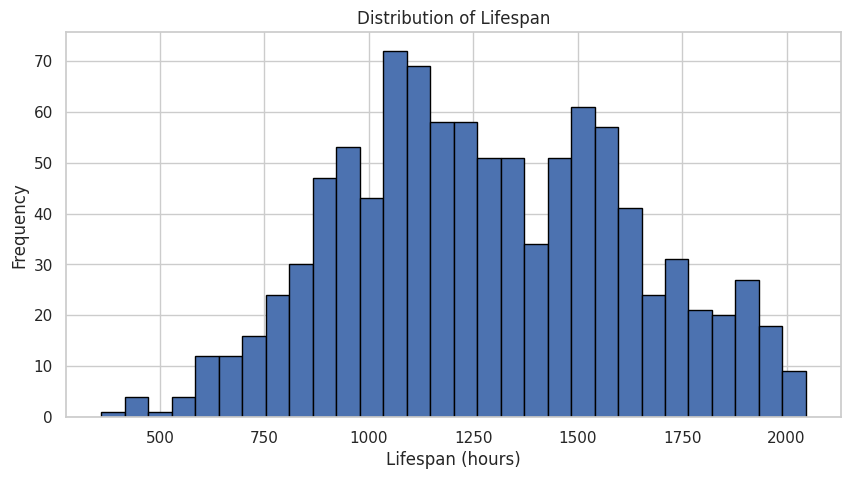

Lifespan summary statistics:


,Lifespan
count,1000.000000
mean,1281.806120
std,341.136845
min,359.710000
25%,1039.690000
50%,1254.995000
75%,1539.062500
max,2046.410000


In [7]:
# ------------------------------------------------------------
# 2.3 Distribution of the Target Variable (Lifespan)
# ------------------------------------------------------------

plt.figure(figsize=(10,5))
plt.hist(df['Lifespan'], bins=30, edgecolor='black')
plt.title("Distribution of Lifespan")
plt.xlabel("Lifespan (hours)")
plt.ylabel("Frequency")
plt.show()

print("Lifespan summary statistics:")
df['Lifespan'].describe()



In [8]:
# ------------------------------------------------------------
# 2.4 Lifespan by Part Type, Microstructure, Cast Type
# ------------------------------------------------------------

group_part = df.groupby('partType')['Lifespan'].agg(['count','mean','std','min','max'])
group_micro = df.groupby('microstructure')['Lifespan'].agg(['count','mean','std','min','max'])
group_cast = df.groupby('castType')['Lifespan'].agg(['count','mean','std','min','max'])

print("Lifespan grouped by partType:\n", group_part)
print("\nLifespan grouped by microstructure:\n", group_micro)
print("\nLifespan grouped by castType:\n", group_cast)


Lifespan grouped by partType:
           count         mean         std     min      max
partType                                                 
Blade       256  1268.525039  350.549099  359.71  2011.27
Block       248  1350.356210  328.936766  605.03  2046.41
Nozzle      268  1306.231642  331.832096  597.96  2029.46
Valve       228  1193.444254  336.125068  425.13  1923.55

Lifespan grouped by microstructure:
                 count         mean         std     min      max
microstructure                                                 
colGrain          326  1277.332791  328.311684  424.24  2043.41
equiGrain         332  1268.330843  342.979047  359.71  2046.41
singleGrain       342  1299.151433  351.452477  460.25  2029.46

Lifespan grouped by castType:
             count         mean         std     min      max
castType                                                   
Continuous    335  1319.607701  346.393071  428.51  2046.41
Die           330  1256.270061  331.369656  424.24 

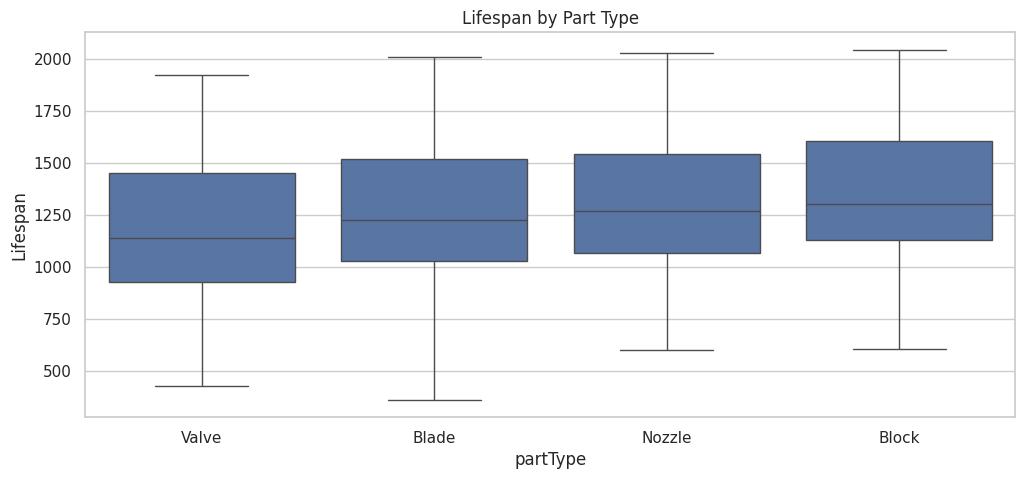

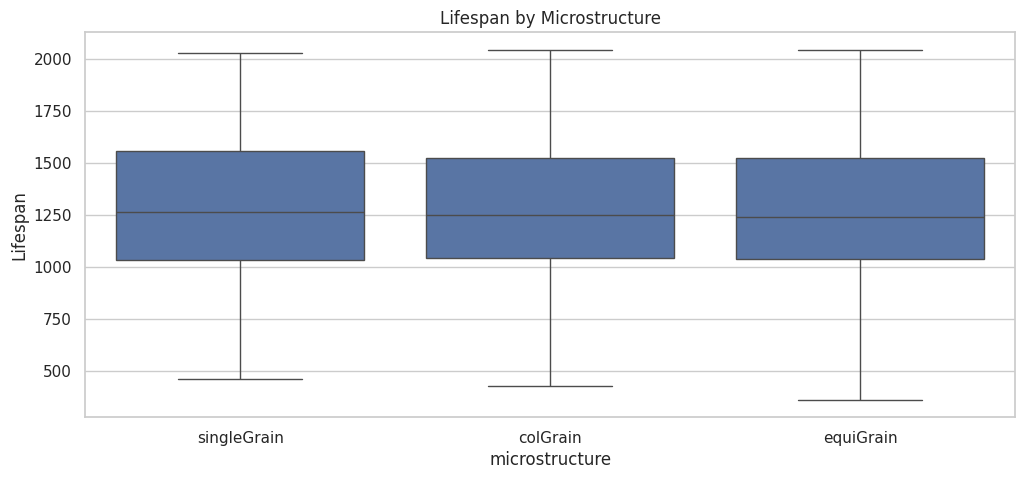

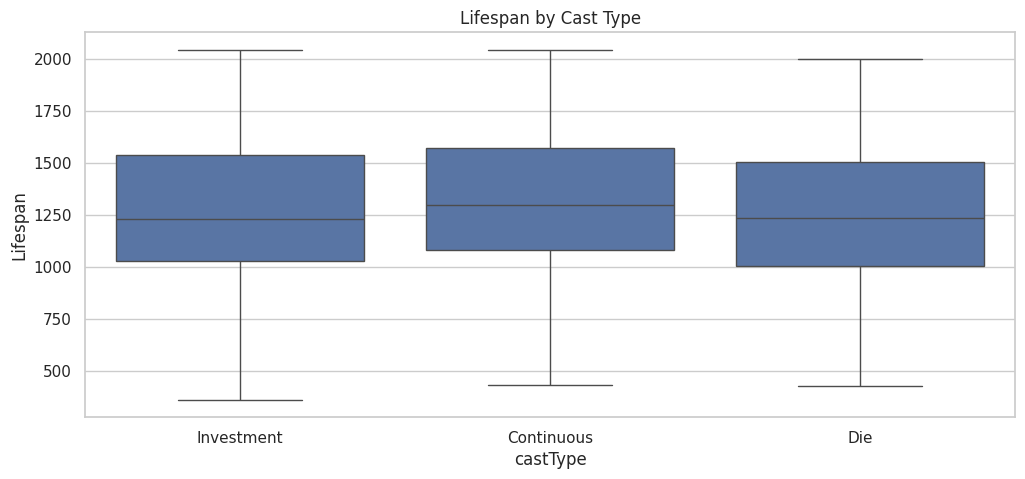

In [9]:
# ------------------------------------------------------------
# 2.5 Boxplots for Lifespan vs Categorical Features
# ------------------------------------------------------------

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='partType', y='Lifespan')
plt.title("Lifespan by Part Type")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='microstructure', y='Lifespan')
plt.title("Lifespan by Microstructure")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='castType', y='Lifespan')
plt.title("Lifespan by Cast Type")
plt.show()


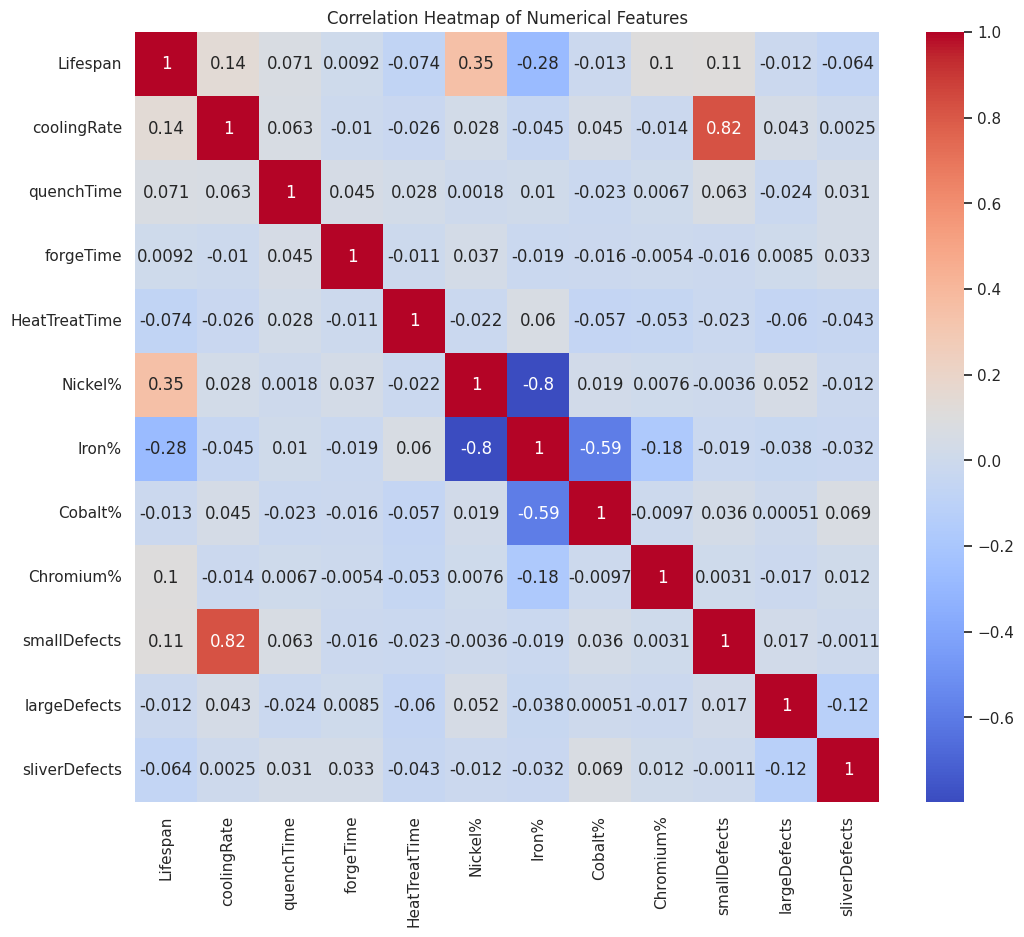

Correlation of numerical features with Lifespan:


,Lifespan
Lifespan,1.000000
Nickel%,0.347533
coolingRate,0.137436
smallDefects,0.113709
Chromium%,0.104553
quenchTime,0.070985
forgeTime,0.009229
largeDefects,-0.011770
Cobalt%,-0.012651
sliverDefects,-0.063549


In [10]:
# ------------------------------------------------------------
# 2.6 Correlation Analysis (Numeric Features)
# ------------------------------------------------------------

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

print("Correlation of numerical features with Lifespan:")
corr["Lifespan"].sort_values(ascending=False)


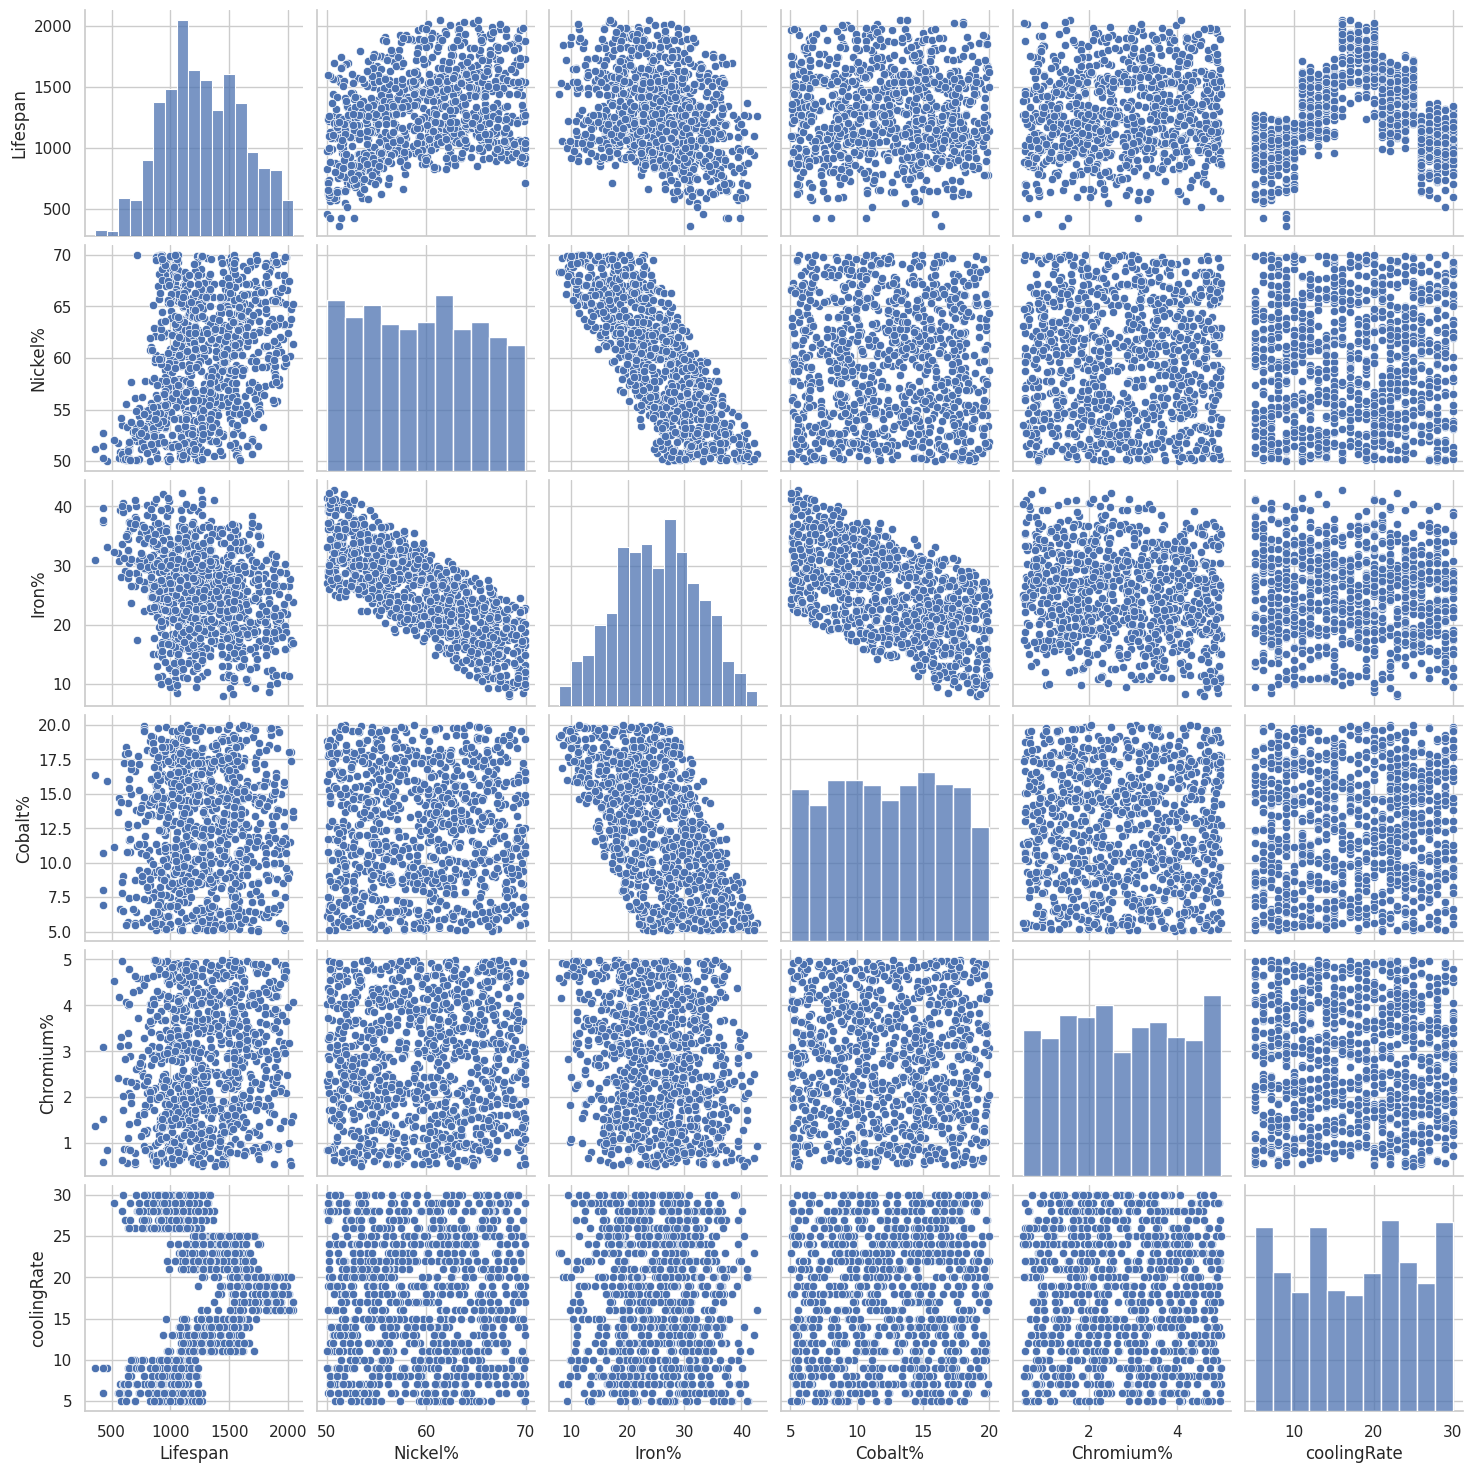

In [11]:
# ------------------------------------------------------------
# 2.7 Pairplot (Optional — can be slow)
# ------------------------------------------------------------

# Uncomment to use (optional)
sns.pairplot(df[['Lifespan','Nickel%','Iron%','Cobalt%','Chromium%','coolingRate']])
plt.show()


In [12]:
# ------------------------------------------------------------
# 2.8 Quick Look at Missing Values (should be none)
# ------------------------------------------------------------

df.isnull().sum()


,0
Lifespan,0
partType,0
microstructure,0
coolingRate,0
quenchTime,0
forgeTime,0
HeatTreatTime,0
Nickel%,0
Iron%,0
Cobalt%,0


In [13]:
# ============================================================
#              PART 3 – REGRESSION IMPLEMENTATION
#          (3.1 Methodology + 3.2 Evaluation – CODE)
# ============================================================

# This code:
# - Loads the dataset
# - Sets up preprocessing (encoding + scaling + train/test split)
# - Defines a baseline model
# - Defines TWO regression models: Ridge + Random Forest
# - Performs hyperparameter tuning with GridSearchCV
# - Evaluates all models on a held-out test set
# - Summarises results in a comparison table
# ------------------------------------------------------------

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt



In [15]:
# Adjust the path if needed for your Colab / local setup
csv_path = "/content/COMP1801_Coursework_Dataset_Corrected.csv"
df = pd.read_csv(csv_path)


In [16]:
# Target: Lifespan (continuous)
y = df["Lifespan"]

In [17]:
# Features: all remaining columns
X = df.drop(columns=["Lifespan"])


In [19]:
# Identify numeric and categorical feature lists
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical features:", categorical_cols)
print("Numeric features:", numeric_cols)

Categorical features: ['partType', 'microstructure', 'seedLocation', 'castType']
Numeric features: ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']


In [20]:
# ------------------------------------------------------------
# 3.1.2 Train / test split
# ------------------------------------------------------------

# Fix random_state for reproducibility (important for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (800, 15)
Test shape : (200, 15)


In [23]:
# ------------------------------------------------------------
# 3.1.3 Pre-processing pipeline
#      - Standardize numeric features
#      - One-hot encode categorical features
# ------------------------------------------------------------

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

In [25]:
# ------------------------------------------------------------
# 3.1.4 Baseline model (mean predictor)
#       (as suggested in the spec for a simple benchmark)
# ------------------------------------------------------------

baseline_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", DummyRegressor(strategy="mean")),
    ]
)

baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline)) # Fixed: removed squared=False and took sqrt
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print("\n=== Baseline (DummyRegressor: predicts mean lifespan) ===")
print(f"RMSE: {baseline_rmse:0.2f}")
print(f"MAE : {baseline_mae:0.2f}")
print(f"R^2 : {baseline_r2:0.4f}")


=== Baseline (DummyRegressor: predicts mean lifespan) ===
RMSE: 351.23
MAE : 295.23
R^2 : -0.0375


In [26]:
# ------------------------------------------------------------
# 3.1.5 Model 1: Ridge Regression
#       (linear model with L2 regularisation)
# ------------------------------------------------------------

ridge_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", Ridge(random_state=42))
    ]
)

ridge_param_grid = {
    "model__alpha": [0.01, 0.1, 1.0, 10.0, 100.0],
    "model__fit_intercept": [True, False]
}

ridge_grid = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",  # we care about RMSE
    n_jobs=-1,
    verbose=1
)

print("\nFitting Ridge Regression grid search...")
ridge_grid.fit(X_train, y_train)

print("\nBest Ridge parameters:", ridge_grid.best_params_)
print("Best CV RMSE (negative):", ridge_grid.best_score_)


Fitting Ridge Regression grid search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Ridge parameters: {'model__alpha': 100.0, 'model__fit_intercept': True}
Best CV RMSE (negative): -308.5742717929572


In [29]:
# Evaluate best Ridge model on test data
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\n=== Best Ridge Regression on test set ===")
print(f"RMSE: {ridge_rmse:0.2f}")
print(f"MAE : {ridge_mae:0.2f}")
print(f"R^2 : {ridge_r2:0.4f}")


=== Best Ridge Regression on test set ===
RMSE: 315.79
MAE : 271.91
R^2 : 0.1613


In [30]:
# ------------------------------------------------------------
# 3.1.6 Model 2: Random Forest Regressor
#       (non-linear, tree-based ensemble)
# ------------------------------------------------------------

rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", RandomForestRegressor(random_state=42))
    ]
)

rf_param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

print("\nFitting Random Forest grid search...")
rf_grid.fit(X_train, y_train)

print("\nBest Random Forest parameters:", rf_grid.best_params_)
print("Best CV RMSE (negative):", rf_grid.best_score_)


Fitting Random Forest grid search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Random Forest parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV RMSE (negative): -88.58279867402898


In [35]:
# Evaluate best RF model on test data
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\n=== Best Random Forest on test set ===")
print(f"RMSE: {rf_rmse:0.2f}")
print(f"MAE : {rf_mae:0.2f}")
print(f"R^2 : {rf_r2:0.4f}")


=== Best Random Forest on test set ===
RMSE: 82.11
MAE : 64.57
R^2 : 0.9433


In [37]:
# ------------------------------------------------------------
# 3.2.1 Compare all models in a summary table
# ------------------------------------------------------------

results_table = pd.DataFrame(
    {
        "Model": ["Baseline (mean)", "Ridge Regression", "Random Forest"],
        "RMSE": [baseline_rmse, ridge_rmse, rf_rmse],
        "MAE": [baseline_mae, ridge_mae, rf_mae],
        "R^2": [baseline_r2, ridge_r2, rf_r2],
    }
)

print("\n=== Regression Model Comparison (test set) ===")
print(results_table.sort_values(by="RMSE"))


=== Regression Model Comparison (test set) ===
              Model        RMSE         MAE       R^2
2     Random Forest   82.109488   64.566490  0.943298
1  Ridge Regression  315.786137  271.913385  0.161313
0   Baseline (mean)  351.225973  295.233094 -0.037497


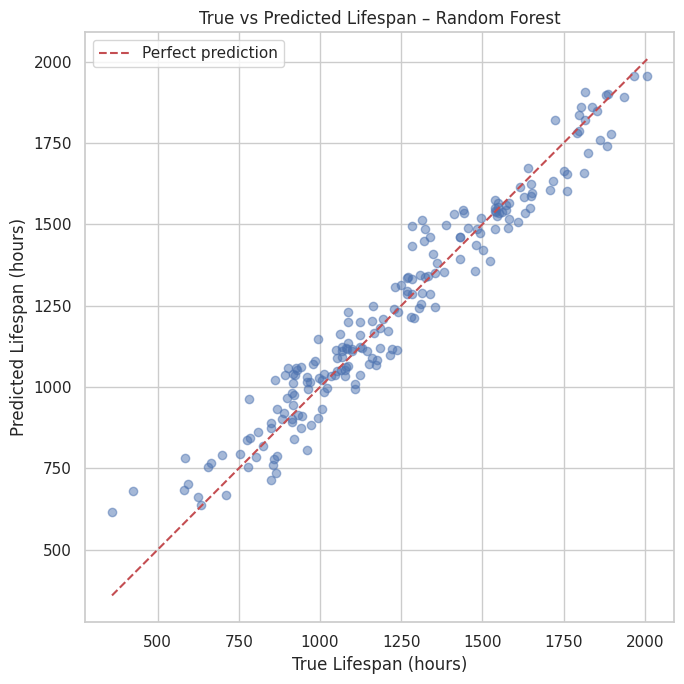

In [38]:
# ------------------------------------------------------------
# 3.2.2 Plot: True vs Predicted Lifespan for best model
#           (choose whichever has the lowest RMSE)
# ------------------------------------------------------------

# Pick best model by RMSE
best_model_name = results_table.sort_values("RMSE").iloc[0]["Model"]

if best_model_name == "Random Forest":
    y_pred_best = y_pred_rf
elif best_model_name == "Ridge Regression":
    y_pred_best = y_pred_ridge
else:
    y_pred_best = y_pred_baseline

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", label="Perfect prediction")
plt.xlabel("True Lifespan (hours)")
plt.ylabel("Predicted Lifespan (hours)")
plt.title(f"True vs Predicted Lifespan – {best_model_name}")
plt.legend()
plt.tight_layout()
plt.show()